In [1]:
import pandas as pd
import sklearn
from sklearn import metrics
import numpy as np
import seaborn as sns
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 
from IPython.display import display as d
from IPython.display import Audio



import os


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Airbnb Project (574)')



Mounted at /content/drive


In [3]:
data = pd.read_csv('Cleandata.csv')

data.drop(columns='Unnamed: 0',inplace=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,11,13,14,15,16,17,26) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
data=data[data['last_scraped']>='2019-05-01']

In [5]:
## Converting Dates

data=data[(data.last_scraped!='f')&(data.last_scraped!='t')]

data['last_scraped'] = data['last_scraped'].str[:7]

data['host_since'] = data['host_since'].str[:7]

##Binary Covid Variable

data['Covid'] = pd.to_datetime(data['last_scraped'])

data['Covid']=np.where(data.Covid>='2020-03-01',1,0)

In [6]:
## Super host

data['host_is_superhost']=data['host_is_superhost'].map({"f":0,'t':1}).fillna(0) 

In [7]:
## Room Type

data['private_room']=data['room_type'].apply(lambda x:1 if x=="Private room" else 0)
data['entire_house']=data['room_type'].apply(lambda x:1 if x=="Entire home/apt" else 0)
data['shared_room']=data['room_type'].apply(lambda x:1 if x=="Shared room" else 0)

In [8]:
## instant_bookable

data['instant_bookable']=data['instant_bookable'].map({"f":0,'t':1}).fillna(0) 

In [9]:
## host_profile_pic

data['host_has_profile_pic']=data['host_has_profile_pic'].apply(lambda x:1 if x=="t" else 0)

In [10]:
## host_identity_verified

data['host_identity_verified']=data['host_identity_verified'].apply(lambda x:1 if x=="t" else 0)

In [11]:
data=data.drop(['room_type'], axis=1)
#data=(data.dropna())

In [12]:
## converting columns into numeric 
for col in data.columns:
    if col not in ['last_scraped' ,'host_since','neighbourhood_cleansed']:
        data[col]=pd.to_numeric(data[col])

In [13]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [14]:
resumetable(data)

Dataset Shape: (801168, 29)


,Name,dtypes,Missing,Uniques
0,id,float64,0,81992
1,host_id,float64,0,39888
2,last_scraped,object,0,21
3,host_since,object,1098,152
4,host_is_superhost,float64,0,2
5,host_listings_count,float64,1158,402
6,host_has_profile_pic,int64,0,2
7,host_identity_verified,int64,0,2
8,neighbourhood_cleansed,object,60,267
9,accommodates,float64,60,23


In [15]:
data.tail()

,id,host_id,last_scraped,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,availability_365,Covid,private_room,entire_house,shared_room
1603472,47389079.0,299035083.0,2021-01,2019-09,0.0,1.0,1,1,Downtown,8.0,NaN,2.0,3.0,30.0,365.0,1.0,100.0,10.0,10.0,10.0,10.0,10.0,1.0,0.0,256.0,1,1,0,0
1603473,47389243.0,372613526.0,2021-01,2020-10,0.0,5.0,1,1,Arcadia,2.0,NaN,1.0,1.0,1.0,1125.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,1,0,0
1603474,47389382.0,14936368.0,2021-01,2019-05,0.0,0.0,1,1,Mar Vista,4.0,NaN,2.0,2.0,30.0,1125.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,28.0,1,0,1,0
1603475,47389961.0,372613526.0,2021-01,2020-10,0.0,5.0,1,1,Arcadia,4.0,NaN,2.0,2.0,3.0,1125.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1,0,1,0
1603476,47390383.0,100116256.0,2021-01,2016-10,0.0,2.0,1,0,Sylmar,4.0,NaN,1.0,2.0,2.0,1125.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,365.0,1,0,1,0


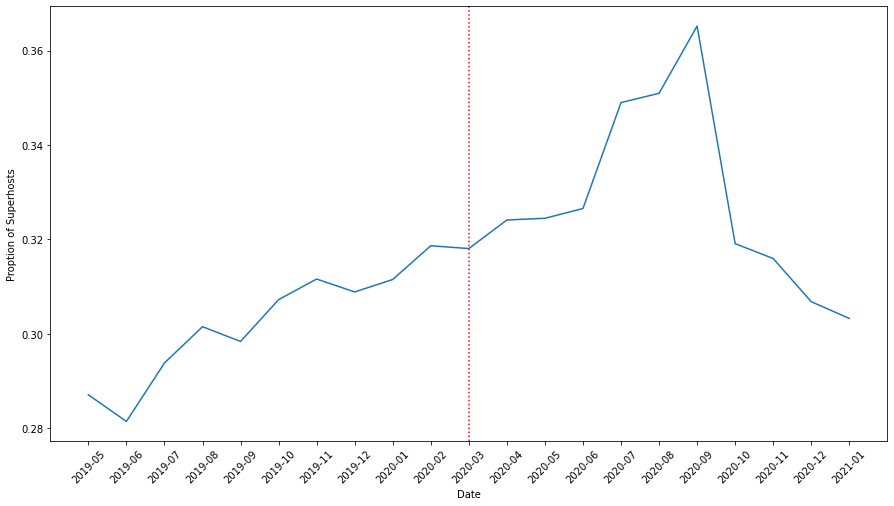

In [16]:
#proportion of hosts that are superhosts


host_viz=pd.pivot_table(data = data, 
               index = ['last_scraped'],
               values = 'host_is_superhost', 
               aggfunc = 'mean').reset_index()

host_viz['host_not_superhost']=-host_viz['host_is_superhost']+1

plt.figure(figsize=(15,8))
fig = sns.lineplot(data=host_viz,x='last_scraped',y='host_is_superhost')
plt.xticks(rotation=45)
covid  = plt.axvline(10, color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date', ylabel='Proption of Superhosts')
plt.show()

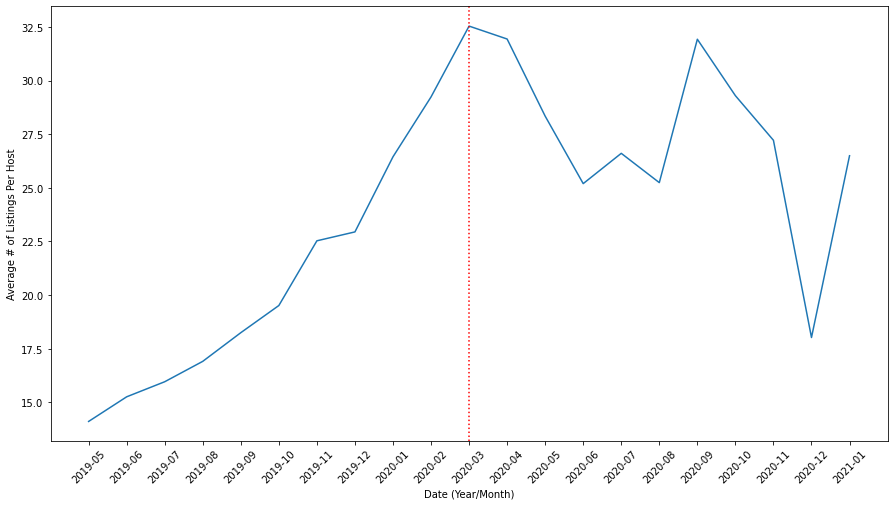

In [17]:
#average listing count per host

listings_viz = pd.pivot_table(data = data, 
               index = ['last_scraped'],
               values = 'host_listings_count', 
               aggfunc = np.mean).reset_index()


plt.figure(figsize=(15,8))
fig = sns.lineplot(data=listings_viz,x='last_scraped',y='host_listings_count')
plt.xticks(rotation=45)
covid  = plt.axvline(10, color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date (Year/Month)', ylabel='Average # of Listings Per Host')
plt.show()

In [18]:
new_hosts = pd.DataFrame(data.host_since.value_counts())

In [19]:
new_hosts['Month'] = new_hosts.index

In [20]:
new_hosts = new_hosts.sort_values(by='Month')

In [21]:
new_hosts = new_hosts.tail(20)

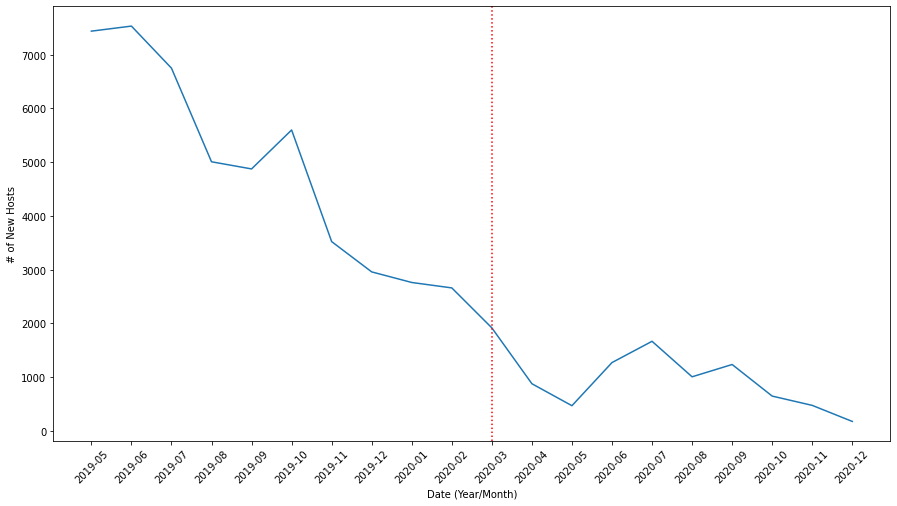

In [22]:
#number of new hosts over time

plt.figure(figsize=(15,8))
fig = sns.lineplot(data=new_hosts,x='Month',y='host_since')
plt.xticks(rotation=45)
covid  = plt.axvline('2020-03', color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date (Year/Month)', ylabel='# of New Hosts')
plt.show()

In [23]:
num_hosts = data.groupby('last_scraped')['host_id'].nunique()

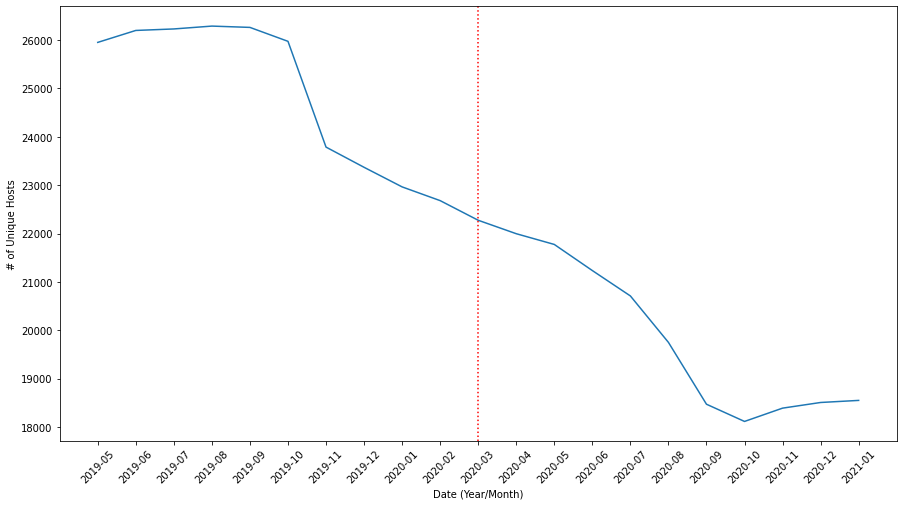

In [24]:
#number of unique hosts at a given time

plt.figure(figsize=(15,8))
fig = sns.lineplot(data=num_hosts)
plt.xticks(rotation=45)
covid  = plt.axvline('2020-03', color = 'red', linestyle = ':')
covid.set_color('red')
fig.set(xlabel='Date (Year/Month)', ylabel='# of Unique Hosts')
plt.show()

In [25]:
top5hoods = data[data.neighbourhood_cleansed.isin(data.neighbourhood_cleansed.value_counts().head().index)]


top5countlistings = pd.pivot_table(top5hoods, index = ['last_scraped','neighbourhood_cleansed'],values='host_listings_count',aggfunc = 'sum').reset_index()

In [26]:
pd.options.display.max_rows=105
top5countlistings.head()

,last_scraped,neighbourhood_cleansed,host_listings_count
0,2019-05,Downtown,93658.0
1,2019-05,Hollywood,48692.0
2,2019-05,Long Beach,8062.0
3,2019-05,Santa Monica,39257.0
4,2019-05,Venice,35427.0


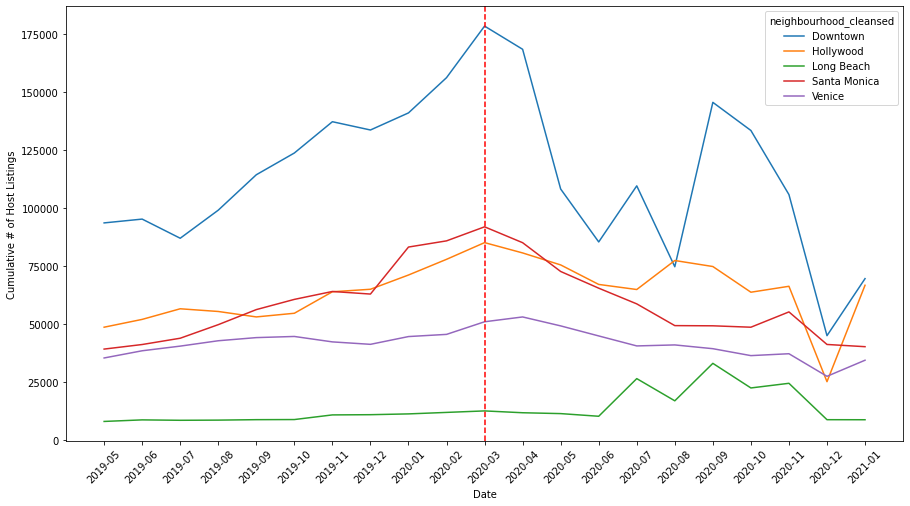

In [27]:
#sum of host listings by neighborhood

plt.figure(figsize=(15,8))
fig = sns.lineplot(data =top5countlistings, x='last_scraped',y='host_listings_count' , hue='neighbourhood_cleansed')
plt.xticks(rotation=45)
fig.set(xlabel='Date')



plt.ylabel('Cumulative # of Host Listings')
covid  = plt.axvline(x='2020-03',linestyle='--')
covid.set_color('red')
plt.show()

In [28]:
typedf = data[['id','last_scraped','neighbourhood_cleansed','private_room','entire_house','shared_room']]
typedf

,id,last_scraped,neighbourhood_cleansed,private_room,entire_house,shared_room
802249,109.0,2019-05,Culver City,0,1,0
802250,344.0,2019-05,Burbank,0,1,0
802251,2708.0,2019-05,Hollywood,1,0,0
802252,2732.0,2019-05,Santa Monica,1,0,0
802253,2864.0,2019-05,Bellflower,0,1,0
...,...,...,...,...,...,...
1603472,47389079.0,2021-01,Downtown,1,0,0
1603473,47389243.0,2021-01,Arcadia,1,0,0
1603474,47389382.0,2021-01,Mar Vista,0,1,0
1603475,47389961.0,2021-01,Arcadia,0,1,0


In [29]:
roomtype = pd.pivot_table(typedf, index = ['last_scraped'],
               values=['private_room','entire_house','shared_room'],
               aggfunc = 'sum').reset_index()

In [30]:
roomtype.head()

,last_scraped,entire_house,private_room,shared_room
0,2019-05,27565,14555,1778
1,2019-06,27927,14704,1844
2,2019-07,28132,14583,1853
3,2019-08,28450,14547,1930
4,2019-09,28420,14397,1768


In [31]:
roomtype['total'] = roomtype['entire_house'] + roomtype['private_room'] + roomtype['shared_room']


In [32]:
roomtype.head()

,last_scraped,entire_house,private_room,shared_room,total
0,2019-05,27565,14555,1778,43898
1,2019-06,27927,14704,1844,44475
2,2019-07,28132,14583,1853,44568
3,2019-08,28450,14547,1930,44927
4,2019-09,28420,14397,1768,44585


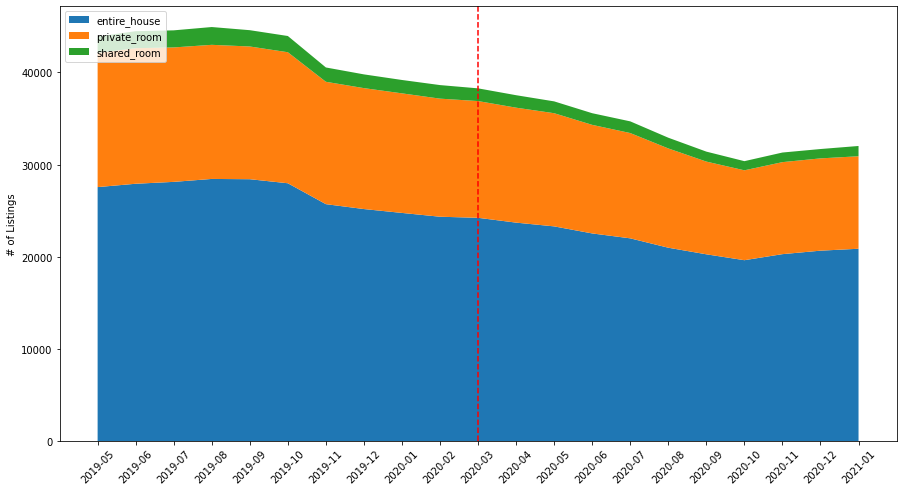

In [33]:
#percentage of listings which are private rooms or shared rooms has decreased but not drastically
plt.figure(figsize=(15,8))
fig =plt.stackplot(roomtype.last_scraped, roomtype.entire_house, roomtype.private_room, roomtype.shared_room, 
              labels=['entire_house','private_room','shared_room'])
plt.xticks(rotation=45)
plt.ylabel('# of Listings')



plt.legend(loc='upper left')

covid  = plt.axvline(x='2020-03',linestyle='--')
covid.set_color('red')
plt.show()

In [34]:
roomperc = roomtype.copy()
roomperc['entire_house'] = roomtype['entire_house'] / roomtype['total']
roomperc['private_room'] = roomtype['private_room'] / roomtype['total']
roomperc['shared_room'] = roomtype['shared_room'] / roomtype['total']

In [36]:
#percentage of listings which are private rooms or shared rooms has decreased but not drastically
roomperc.head()

,last_scraped,entire_house,private_room,shared_room,total
0,2019-05,0.627933,0.331564,0.040503,43898
1,2019-06,0.627926,0.330613,0.041461,44475
2,2019-07,0.631215,0.327208,0.041577,44568
3,2019-08,0.633249,0.323792,0.042959,44927
4,2019-09,0.637434,0.322911,0.039655,44585


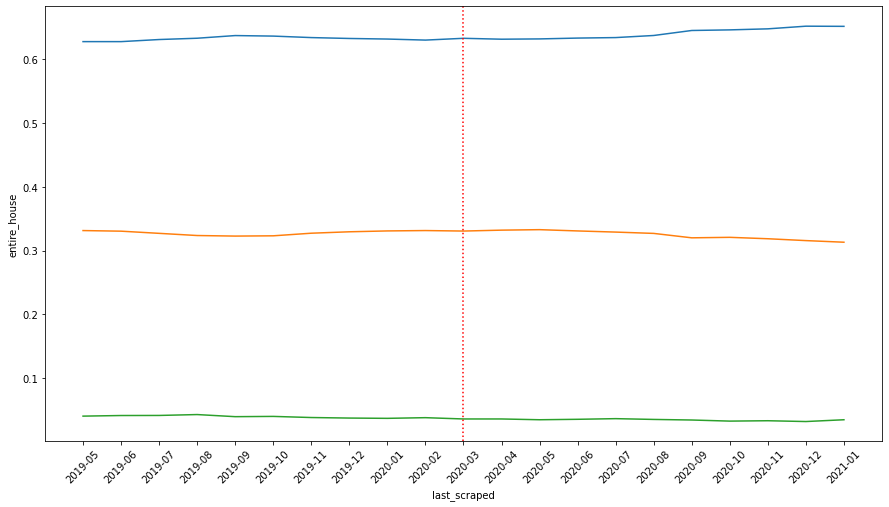

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=roomperc,x='last_scraped',y='entire_house')
sns.lineplot(data=roomperc,x='last_scraped',y='private_room')
sns.lineplot(data=roomperc,x='last_scraped',y='shared_room')


plt.xticks(rotation=45)
covid  = plt.axvline(10, color = 'red', linestyle = ':')
covid.set_color('red')
plt.show()

<Figure size 1080x576 with 0 Axes>

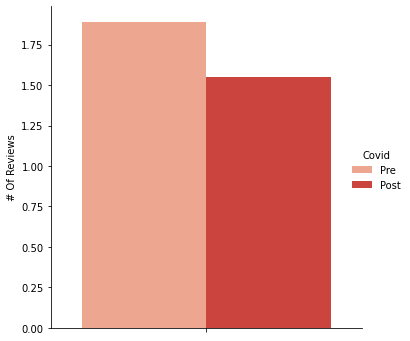

In [38]:
#number of reviews per month

review_viz=pd.pivot_table(data, index = ['Covid'],
               values='reviews_per_month',
               aggfunc = 'mean').reset_index()

review_viz['Reviews Per Month']=['Reviews Per Month','Reviews Per Month']

plt.figure(figsize=(15,8))
fig = sns.catplot(
    data=review_viz, 
    kind="bar",
    x='Reviews Per Month', 
    y='reviews_per_month', 
    hue="Covid",
    palette="Reds",
)
fig.set(xlabel=None)
fig.set(xticklabels=[])
fig.set(ylabel='# Of Reviews')

new_labels = ['Pre', 'Post']
for t, l in zip(fig._legend.texts, new_labels): t.set_text(l)
plt.show()

<Figure size 1080x576 with 0 Axes>

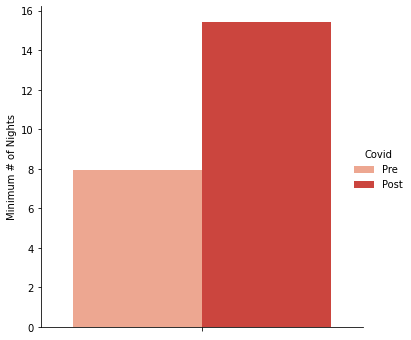

In [39]:
#number of minimum nights has significantly decreased

nights_viz=pd.pivot_table(data, index = ['Covid'],
               values='minimum_nights',
               aggfunc = 'mean').reset_index()



nights_viz['minimum__nights']=['minimum_nights','minimum_nights']

plt.figure(figsize=(15,8))
fig = sns.catplot(
    data=nights_viz, 
    kind="bar",
    x='minimum__nights', 
    y='minimum_nights', 
    hue="Covid",
    palette="Reds",
)
fig.set(xlabel=None)
fig.set(xticklabels=[])
fig.set(ylabel='Minimum # of Nights')

new_labels = ['Pre', 'Post']
for t, l in zip(fig._legend.texts, new_labels): t.set_text(l)
plt.show()

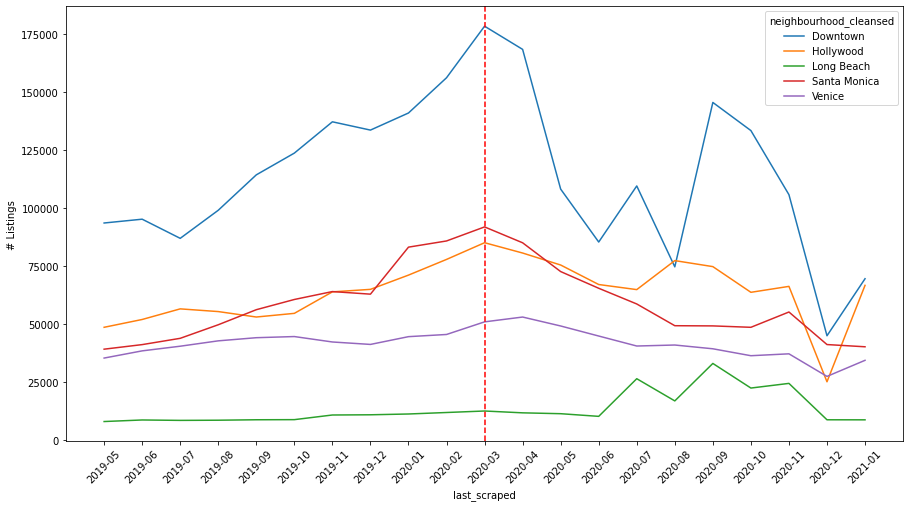

In [40]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data =top5countlistings, x='last_scraped',y='host_listings_count' , hue='neighbourhood_cleansed')
plt.xticks(rotation=45)
plt.ylabel('# Listings')
covid  = plt.axvline(x='2020-03',linestyle='--')
covid.set_color('red')
plt.show()

In [41]:
cdata=data[data.Covid==1]
pdata=data[data.Covid!=1]

[[]]

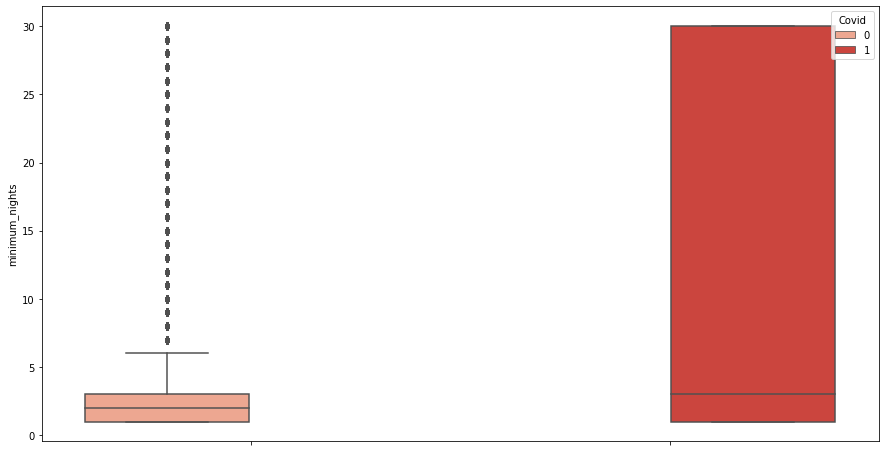

In [42]:
boxviz=data.copy()

boxviz = boxviz[boxviz['minimum_nights'].between
                        (boxviz['minimum_nights'].quantile(0), 
                         boxviz['minimum_nights'].quantile(.90))]

plt.figure(figsize=(15,8))
fig = sns.boxplot(
    data=boxviz, 
    x='Covid', 
    y='minimum_nights', 
    hue="Covid",
    palette="Reds",
)
fig.set(xlabel=None)
fig.set(xticklabels=[])


In [43]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=pdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1171.
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:56:49   Log-Likelihood:            -7.0620e+05
No. Observations:              337413   AIC:                         1.412e+06
Df Residuals:                  337408   BIC:                         1.412e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [44]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=cdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     972.3
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:56:50   Log-Likelihood:            -5.6500e+05
No. Observations:              287622   AIC:                         1.130e+06
Df Residuals:                  287617   BIC:                         1.130e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [45]:
viz=pd.DataFrame()
viz['Review Score']=['Cleanliness','Check In','Communication','Location','Cleanliness','Check In','Communication','Location']
viz['scores']=[0.1797 , 0.0212,0.0576,0.0437,0.1576 ,0.0263  , 0.0315, 0.0265 ]
viz['Covid']=['Pre','Pre','Pre','Pre','Post','Post','Post','Post' ]


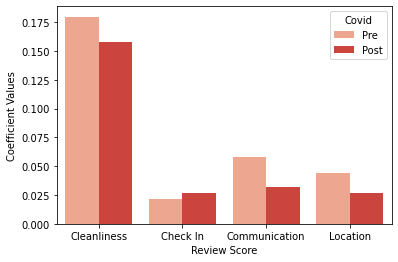

In [46]:
fig=sns.barplot(data=viz,
                x ='Review Score',
            y = 'scores',
                hue='Covid',
                palette='Reds')

fig.set(ylabel='Coefficient Values')
plt.show()

In [47]:
priv_pdata=pdata[pdata['private_room']==1]
priv_cdata=cdata[cdata['private_room']==1]

shar_pdata=pdata[pdata['shared_room']==1]
shar_cdata=cdata[cdata['shared_room']==1]

ent_pdata=pdata[pdata['entire_house']==1]
ent_cdata=cdata[cdata['entire_house']==1]


In [48]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=priv_pdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     307.8
Date:                Tue, 16 Mar 2021   Prob (F-statistic):          8.80e-264
Time:                        21:56:54   Log-Likelihood:            -2.2597e+05
No. Observations:              106660   AIC:                         4.519e+05
Df Residuals:                  106655   BIC:                         4.520e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [49]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=priv_cdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     266.2
Date:                Tue, 16 Mar 2021   Prob (F-statistic):          7.42e-228
Time:                        21:56:55   Log-Likelihood:            -1.7638e+05
No. Observations:               90792   AIC:                         3.528e+05
Df Residuals:                   90787   BIC:                         3.528e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [50]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=ent_pdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     774.3
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:56:56   Log-Likelihood:            -4.5548e+05
No. Observations:              217941   AIC:                         9.110e+05
Df Residuals:                  217936   BIC:                         9.110e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [51]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=ent_cdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     630.8
Date:                Tue, 16 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:56:57   Log-Likelihood:            -3.7136e+05
No. Observations:              187605   AIC:                         7.427e+05
Df Residuals:                  187600   BIC:                         7.428e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [52]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=shar_pdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.85
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.87e-11
Time:                        21:56:57   Log-Likelihood:                -19351.
No. Observations:               11084   AIC:                         3.871e+04
Df Residuals:                   11079   BIC:                         3.875e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [53]:
print(smf.ols(formula='reviews_per_month ~ review_scores_cleanliness+review_scores_checkin+review_scores_communication+review_scores_location',data=shar_cdata).fit().summary())

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.142
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           9.80e-06
Time:                        21:56:58   Log-Likelihood:                -11749.
No. Observations:                7641   AIC:                         2.351e+04
Df Residuals:                    7636   BIC:                         2.354e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [54]:
top5hoods = data[data.neighbourhood_cleansed.isin(data.neighbourhood_cleansed.value_counts().head().index)]


top5countlistings = pd.pivot_table(top5hoods, index = ['last_scraped','neighbourhood_cleansed'],values='host_listings_count',aggfunc = 'sum').reset_index()

In [55]:
top5countrevs=pd.pivot_table(top5hoods, index = ['last_scraped','neighbourhood_cleansed'],values='reviews_per_month',aggfunc = 'sum').reset_index()

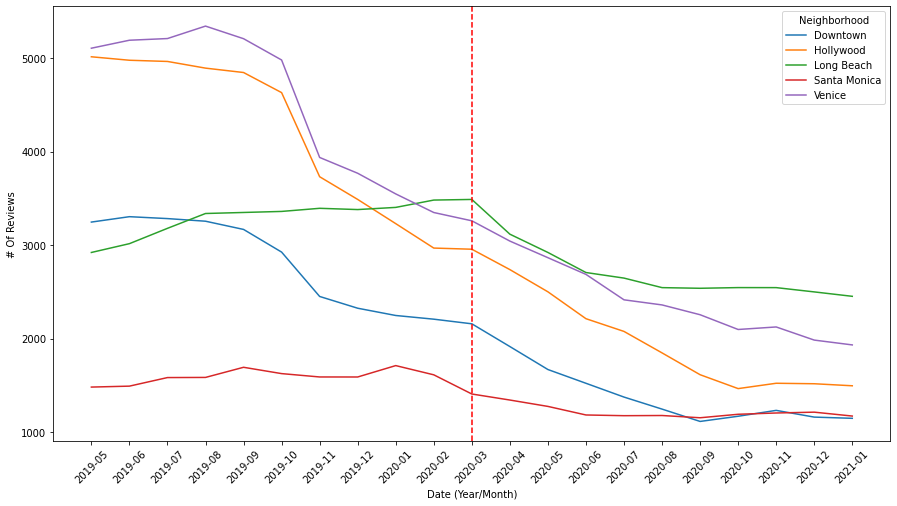

In [56]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data =top5countrevs, x='last_scraped',y='reviews_per_month' , hue='neighbourhood_cleansed')
plt.xticks(rotation=45)
fig.set(xlabel='Date (Year/Month)')

plt.ylabel('# Of Reviews')
plt.legend(title='Neighborhood')
covid  = plt.axvline(x='2020-03',linestyle='--')
covid.set_color('red')
plt.show()

In [57]:
top5countrevs.head()

,last_scraped,neighbourhood_cleansed,reviews_per_month
0,2019-05,Downtown,3246.00
1,2019-05,Hollywood,5014.34
2,2019-05,Long Beach,2920.88
3,2019-05,Santa Monica,1480.93
4,2019-05,Venice,5106.07


In [58]:
top5dummies = pd.get_dummies(top5hoods['neighbourhood_cleansed'])

In [60]:
top5dummies.head()

,Downtown,Hollywood,Long Beach,Santa Monica,Venice
802251,0,1,0,0,0
802252,0,0,0,1,0
802259,0,1,0,0,0
802266,0,0,0,0,1
802267,0,0,1,0,0


In [61]:
newtop5 = top5hoods.merge(top5dummies, left_index=True, right_index=True)

In [62]:
newtop5.drop(columns='neighbourhood_cleansed',inplace=True)

In [63]:
top5pre = newtop5[newtop5.Covid==0]
top5post = newtop5[newtop5.Covid==1]

In [64]:
top5pre.drop(columns=['id','Covid','host_id', 'last_scraped','host_since'],inplace=True)
top5post.drop(columns=['id','Covid','host_id', 'last_scraped','host_since'],inplace=True)

In [65]:
top5pre.head()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,availability_365,private_room,entire_house,shared_room,Downtown,Hollywood,Long Beach,Santa Monica,Venice
802251,1.0,2.0,1,1,1.0,1.5,1.0,1.0,6.0,366.0,18.0,98.0,10.0,10.0,10.0,10.0,10.0,0.30,1.0,277.0,1,0,0,0,1,0,0,0
802252,0.0,2.0,1,0,1.0,1.0,1.0,1.0,1.0,180.0,18.0,96.0,9.0,10.0,10.0,10.0,9.0,0.19,0.0,281.0,1,0,0,0,0,0,1,0
802259,1.0,2.0,1,1,1.0,1.5,1.0,1.0,6.0,366.0,13.0,96.0,9.0,10.0,10.0,9.0,9.0,0.11,1.0,249.0,1,0,0,0,1,0,0,0
802266,1.0,1.0,1,1,2.0,1.0,0.0,1.0,3.0,22.0,378.0,94.0,10.0,10.0,10.0,10.0,9.0,3.29,0.0,330.0,0,1,0,0,0,0,0,1
802267,1.0,1.0,1,1,2.0,1.5,1.0,1.0,2.0,1125.0,371.0,95.0,10.0,10.0,10.0,10.0,10.0,4.92,1.0,58.0,1,0,0,0,0,1,0,0


In [66]:
factorspre = list(top5pre.corr()['number_of_reviews'].sort_values(ascending=False)[2:].head(10).index)

In [67]:
factorspost = list(top5post.corr()['number_of_reviews'].sort_values(ascending=False)[2:].head(10).index)

In [68]:
no_longer_important = []
for i in factorspre:
  if i not in factorspost:
    no_longer_important.append(i)

no_longer_important

[]

In [69]:
now_important = []
for i in factorspost:
  if i not in factorspre :
    now_important.append(i)

now_important

[]

In [70]:
top5pre.corr()['number_of_reviews'].sort_values(ascending=False)[2:].head(10)

host_is_superhost              0.226315
host_identity_verified         0.156209
Venice                         0.138259
review_scores_checkin          0.092528
review_scores_location         0.086737
review_scores_communication    0.079931
review_scores_cleanliness      0.070962
review_scores_rating           0.068409
availability_365               0.058211
review_scores_value            0.043505
Name: number_of_reviews, dtype: float64

In [71]:
top5post.corr()['number_of_reviews'].sort_values(ascending=False)[2:].head(10)

host_is_superhost              0.245443
Venice                         0.131587
review_scores_checkin          0.094256
review_scores_cleanliness      0.094015
review_scores_communication    0.091702
review_scores_rating           0.090798
host_identity_verified         0.088570
review_scores_location         0.081698
review_scores_value            0.075026
availability_365               0.065310
Name: number_of_reviews, dtype: float64

In [72]:
top5pre.corr()['review_scores_rating'].sort_values(ascending=False)[2:].head(10)

review_scores_communication    0.716591
review_scores_cleanliness      0.706703
review_scores_checkin          0.678397
review_scores_location         0.555218
host_is_superhost              0.280316
host_identity_verified         0.075745
Venice                         0.072457
reviews_per_month              0.068618
number_of_reviews              0.068409
Santa Monica                   0.063252
Name: review_scores_rating, dtype: float64

In [73]:
top5post.corr()['review_scores_rating'].sort_values(ascending=False)[2:].head(10)

review_scores_communication    0.731046
review_scores_cleanliness      0.723537
review_scores_checkin          0.668958
review_scores_location         0.561834
host_is_superhost              0.283045
number_of_reviews              0.090798
Venice                         0.069911
reviews_per_month              0.068515
Santa Monica                   0.058755
Long Beach                     0.050761
Name: review_scores_rating, dtype: float64

In [74]:
top5pre.head()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,availability_365,private_room,entire_house,shared_room,Downtown,Hollywood,Long Beach,Santa Monica,Venice
802251,1.0,2.0,1,1,1.0,1.5,1.0,1.0,6.0,366.0,18.0,98.0,10.0,10.0,10.0,10.0,10.0,0.30,1.0,277.0,1,0,0,0,1,0,0,0
802252,0.0,2.0,1,0,1.0,1.0,1.0,1.0,1.0,180.0,18.0,96.0,9.0,10.0,10.0,10.0,9.0,0.19,0.0,281.0,1,0,0,0,0,0,1,0
802259,1.0,2.0,1,1,1.0,1.5,1.0,1.0,6.0,366.0,13.0,96.0,9.0,10.0,10.0,9.0,9.0,0.11,1.0,249.0,1,0,0,0,1,0,0,0
802266,1.0,1.0,1,1,2.0,1.0,0.0,1.0,3.0,22.0,378.0,94.0,10.0,10.0,10.0,10.0,9.0,3.29,0.0,330.0,0,1,0,0,0,0,0,1
802267,1.0,1.0,1,1,2.0,1.5,1.0,1.0,2.0,1125.0,371.0,95.0,10.0,10.0,10.0,10.0,10.0,4.92,1.0,58.0,1,0,0,0,0,1,0,0
